<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 1 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Tarea 1: Voter Model
-------------------------
### Descripción
El modelo del votante describe la formación de consenso en una población de individuos cuya única acción es cambiar de opinión copiando la de uno de sus vecinos.

En cada sitio de la red $x$, la opinión de un votante $s(x)$ puede estar en uno de 2 estados $\pm 1$.....
### Simulacion
Se dispone una grilla de agentes, se toma un agente aleatorio dela grilla y se verifica sus vecinos (von neumann), si el vecino es distinto, el agente lo copia. esto representa 1/N de un paso temporal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import trange

In [2]:
###Función###
def voter_model(N, iters, seed, num, carpeta):
    start=time.time()
    for x in range(1,num+1):    ##Con esto definimos el número de simulaciones a realizar
        semilla= seed+(x-1)
        np.random.seed(semilla) ##Toma una semilla individual para cada simulacion, sumando 1 a la anterior
        Ci = np.random.choice([0, 1], [N,N])    ##Crea la condicion inicial
        M = np.zeros(iters)     ##Matriz para calcular consenso vs tiempo
        path = './Simulacion/'+ str(carpeta)+'/' + str(x).zfill(4) ##Ruta donde se guardarán los archivos
        iterstart=time.time()
        if not os.path.exists(path):
            os.makedirs(path+'/data', exist_ok=True)
            os.makedirs(path+'/Imagenes', exist_ok=True)
        with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
            file.write( 'El tamaño del sistema es: '+str(N)+'x'+str(N))
            file.write('\n')
            file.write('Se realizaron '+str(iters)+' pasos temporales')
            file.write('\n')
            file.write( 'La semilla utilizada fue: '+str(semilla))
            file.write('\n')
        B= np.copy(Ci)  ##Se copia la condicion inicial, para no trabajar sobre ella
        for iter in trange(iters):
            M[iter] = np.sum(B)    ##Calcula la suma total de spin 1 en la matriz
            if np.sum(B)/N**2 ==1 or np.sum(B)==0:
                break
            if iter ==0:        ##No aplica el avance temporal a la condicion inicial
                pass
            else:
                aux2=1      ##Variable auxiliar para definir el paso temporal
                while aux2%N !=0:   
                    a, b = np.random.choice(N), np.random.choice(N) ##Toma 2 indices aleatorios
                    vecino = np.random.choice([B[(a-1)%N, b], B[(a+1)%N, b], B[a, (b-1)%N], B[a, (b+1)%N]]) #elige un vecino aleatorio
                    if B[a][b]==vecino: ##Si son iguales, no pasa nada
                        pass
                    else:
                        B[a][b]=vecino  ##Si son distintos, se cambia
                    aux2+=1
            np.save(path + '/data/' + (str(iter).zfill(4)),B.astype(np.int8)) ##Guarda las matrices en npy
            plt.imshow(B, cmap='Greys', vmin=0, vmax=1)                         ##Plotea cada paso temporal
            plt.savefig(path+'/Imagenes/'+str(iter).zfill(4) + '.png')
        iterend=time.time()
        with open(path+'/log.txt', 'a') as file:
            file.write("Esta simulación se demoró : "+str(iterend-iterstart)+ " segundos")
        plt.close('all')
        M = M[:iter+1]
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))   ##Crea la figura de resumen
        axes[0].imshow(Ci, cmap='Greys', vmin=0, vmax=1)
        axes[0].set_title('Estado Inicial')
        axes[1].imshow(B, cmap='Greys', vmin=0, vmax=1)
        axes[1].set_title('Estado Final')  
        axes[2].plot(M/N**2)
        axes[2].set_ylim(0,1.1)
        axes[2].set_xlabel("Step")
        axes[2].set_ylabel("Consenso")
        axes[2].set_title("Consenso vs tiempo")
        axes[2].grid(True)
        plt.savefig(path+'/Resumen.png')
        #plt.close('all')
    end=time.time()
    print("El tiempo total de demora es "+str(end-start)+ " segundos")

100%|██████████| 40/40 [00:46<00:00,  1.15s/it]


El tiempo total de demora es 46.907806634902954 segundos


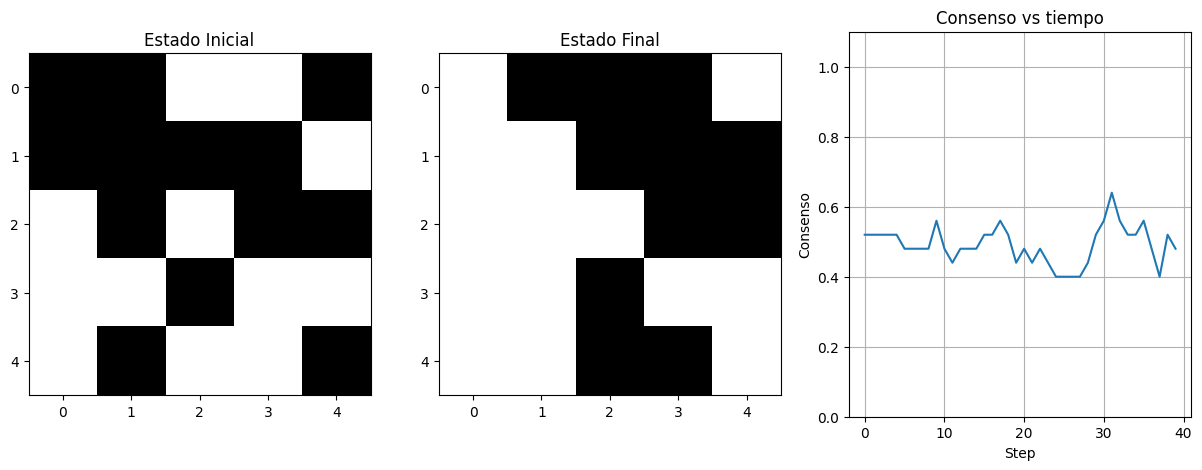

In [3]:
voter_model(5, 40, 1, 1, 'Test4')